# Big Data in Finance
## Part II: CRSP and Compustat
### Homework I: Due February 19, 2020, by 3:59 pm.


**Goal**: Make sure you have all set up for our next class.

**Delivery**: Please, upload on canvas a .zip file with your .ipynb and .html notebook. 

This homework should be simple. Your task is to make sure you can run all cells bellow without an error.


# Packages

Make sure you have installed all required packages. Use "conda install"  or "pip install" if you you are missing any of the packages.

In [1]:
# Packages
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import wrds

# Setups
pd.set_option("display.max_rows", None)

#   WRDS Connection

Make sure you can connect to WRDS server. You should configure wrds connector before hand. Please check the syllabus for details.


In [3]:
# Set Up WRDS connection
db = wrds.Connection(wrds_username='lmota') # make sure to change the username. 


Enter your WRDS username [ianhojy]:ianhojy
Enter your password:········
WRDS recommends setting up a .pgpass file.
You can find more info here:
https://www.postgresql.org/docs/9.5/static/libpq-pgpass.html.
Loading library list...
Done


# Test WRDS Connection

## Determine the libraries available at WRDS

In [4]:
# List all libraries in WRDS
libs = db.list_libraries()
libs.__class__ # Notice that libs is a list. 
pd.DataFrame({'libraries':libs}).sort_values('libraries') # Transform libs to a Pandas data frame to have a better display.

libraries
139                          aha
57                    aha_sample
153                      ahasamp
154                        audit
52              audit_audit_comp
92              audit_corp_legal
155                         bank
156                         blab
157                        block
258                      boardex
257                  boardex_eur
137                   boardex_na
256                  boardex_row
48                 boardex_trial
259                   boardex_uk
158                     boardsmp
159                          bvd
114                bvd_ama_large
115               bvd_ama_medium
56                 bvd_ama_small
86             bvd_ama_verylarge
75                  bvd_bvdbankf
82               bvd_orbis_large
83              bvd_orbis_medium
84               bvd_orbis_small
160                      bvdlgcy
161                      bvdsamp
60               calcbench_trial
162                     calcbnch
163                         cboe
164                      centris
165                          ciq
113                   ciq_common
59                ciq_common_new
106                   ciq_keydev
102                  ciq_ratings
166                      ciqsamp
72                ciqsamp_common
95           ciqsamp_transcripts
167                        cisdm
168                        clrvt
169                     clrvtsmp
126                         comp
121                    comp_bank
254              comp_bank_daily
103              comp_emdb_daily
104            comp_emdb_monthly
107               comp_execucomp
108                 comp_filings
122                  comp_global
251            comp_global_daily
123           comp_segments_hist
255     comp_segments_hist_daily
53                 comp_snapshot
170                        compa
171                        compb
35                        compbd
32                         compd
249                     compdcur
172                        compg
33                        compgd
173                        comph
174                        compm
175                     compmcur
176                     compsamp
177                      compseg
36                      compsegd
178                     compsnap
179                     comscore
180                      contrib
63          contrib_char_returns
28      contrib_char_returns_new
64               contrib_general
41           contrib_general_new
181                         crsp
89                    crsp_a_ccm
62                crsp_a_indexes
85                  crsp_a_stock
99             crsp_a_treasuries
88                    crsp_q_ccm
94                crsp_q_indexes
97              crsp_q_indexhist
120           crsp_q_mutualfunds
91                  crsp_q_stock
96             crsp_q_treasuries
37                         crspa
182                        crspm
183                        crspq
184                     crspsamp
185                        csmar
186                     dealscan
187                       djones
188                         dmef
189                          doe
190                         emdb
191                         etfg
39                     etfg_samp
192                     etfgsamp
193                       eureka
67            eurekahedge_sample
194                         evts
195                     execcomp
70               factsamp_revere
196                      factset
197                           ff
198                         fisd
140                    fisd_fisd
22                     fisd_naic
199                     fisdsamp
138               fjc_litigation
200                          frb
201                       fssamp
202                         ftse
203                     ftsesamp
204                     ginsight
12                ginsight_basic
13               ginsight_common
205                          gmi
1                    gmi_all_new
206                        govpx
207                     govpxs

 ## Determine the datasets within a given library

In [5]:
compd_tables = db.list_tables(library="compm") # compd: Compustat daily update
pd.DataFrame({'tables':compd_tables}) # Transform libs to a Pandas data frame to have a better display.

tables
0                    aco_amda
1                    aco_imda
2                 aco_indfnta
3                 aco_indfntq
4               aco_indfntytd
5                  aco_indsta
6                  aco_indstq
7                aco_indstytd
8                  aco_notesa
9                  aco_notesq
10                aco_notessa
11               aco_notesytd
12                 aco_pnfnda
13                 aco_pnfndq
14               aco_pnfndytd
15                 aco_pnfnta
16                 aco_pnfntq
17               aco_pnfntytd
18                 aco_transa
19                 aco_transq
20                aco_transsa
21               aco_transytd
22                   adsprate
23                  asec_imda
24                asec_notesa
25                asec_notesq
26                asec_transa
27                asec_transq
28                      chars
29                co_aacctchg
30                  co_aaudit
31                 co_adesind
32                 co_adjfact
33                   co_afnd1
34                   co_afnd2
35                 co_afnddc1
36                 co_afnddc2
37                co_afntind1
38                co_afntind2
39                 co_ainvval
40                    co_amkt
41                co_busdescl
42                  co_cotype
43                co_filedate
44                 co_fortune
45                    co_hgic
46                co_iacctchg
47                  co_iaudit
48                 co_idesind
49                   co_ifndq
50                  co_ifndsa
51                 co_ifndytd
52                   co_ifntq
53                  co_ifntsa
54                 co_ifntytd
55                    co_imkt
56                co_industry
57                    co_ipcd
58                    company
59                   co_mthly
60                 co_offtitl
61                   currency
62                   dd_group
63              dd_group_xref
64                    dd_item
65                 dd_package
66                 ecind_desc
67                  ecind_mth
68                   exrt_dly
69                   exrt_mth
70                      funda
71                 funda_fncd
72                      fundq
73                 fundq_fncd
74                    idx_ann
75                 idx_anndes
76                 idxcst_his
77                  idx_daily
78                  idx_index
79                    idx_mth
80                    idx_qrt
81                 idx_qrtdes
82              io_qaggregate
83                io_qbuysell
84                io_qchanges
85               io_qfloatadj
86                io_qholders
87                it_mbuysell
88                it_msummary
89                  it_r_rltn
90                      names
91           names_aco_indsta
92           names_aco_indstq
93           names_aco_pnfnda
94           names_aco_pnfndq
95             names_adsprate
96                     namesd
97                   names_ix
98               names_ix_cst
99                     namesm
100                    namesq
101                 names_seg
102                  r_accstd
103                 r_acqmeth
104                r_auditors
105                  r_auopic
106                 r_balpres
107                r_cf_formt
108                r_coindpre
109                r_compstat
110                  r_consol
111               r_co_status
112                 r_country
113                r_cstclscd
114                r_datacode
115                 r_datafmt
116            r_divtaxmarker
117                 r_docsrce
118               r_exchgtier
119                r_ex_codes
120                r_exrt_typ
121                r_fndfntcd
122                 r_footnts
123                  r_foricd
124                   r_giccd
125                r_hcalendr
126                r_idxclscd
127                r_inactvcd
128                r_incstats
129                  r_indfmt
130                  r_indsec
131                  r_invval
132                r_issuetyp
133

 ## Determine the column headers (variables) within a given dataset

In [6]:
db.describe_table(library="compm", table="funda")

Approximately 777983 rows in compm.funda.


name  nullable              type
0            gvkey      True        VARCHAR(6)
1         datadate      True              DATE
2            fyear      True  DOUBLE PRECISION
3           indfmt      True       VARCHAR(12)
4           consol      True        VARCHAR(2)
5           popsrc      True        VARCHAR(1)
6          datafmt      True       VARCHAR(12)
7              tic      True        VARCHAR(8)
8            cusip      True        VARCHAR(9)
9             conm      True       VARCHAR(57)
10         acctchg      True        VARCHAR(8)
11         acctstd      True        VARCHAR(8)
12         acqmeth      True        VARCHAR(2)
13            adrr      True  DOUBLE PRECISION
14            ajex      True  DOUBLE PRECISION
15             ajp      True  DOUBLE PRECISION
16            bspr      True        VARCHAR(8)
17          compst      True        VARCHAR(8)
18           curcd      True        VARCHAR(3)
19          curncd      True        VARCHAR(3)
20          currtr      True  DOUBLE PRECISION
21         curuscn      True  DOUBLE PRECISION
22           final      True        VARCHAR(2)
23             fyr      True  DOUBLE PRECISION
24           ismod      True  DOUBLE PRECISION
25            ltcm      True        VARCHAR(8)
26             ogm      True        VARCHAR(8)
27           pddur      True  DOUBLE PRECISION
28             scf      True  DOUBLE PRECISION
29             src      True  DOUBLE PRECISION
30           stalt      True        VARCHAR(2)
31            udpl      True        VARCHAR(8)
32             upd      True  DOUBLE PRECISION
33        apdedate      True              DATE
34           fdate      True              DATE
35           pdate      True              DATE
36           acchg      True  DOUBLE PRECISION
37            acco      True  DOUBLE PRECISION
38           accrt      True  DOUBLE PRECISION
39            acdo      True  DOUBLE PRECISION
40             aco      True  DOUBLE PRECISION
41           acodo      True  DOUBLE PRECISION
42         acominc      True  DOUBLE PRECISION
43            acox      True  DOUBLE PRECISION
44          acoxar      True  DOUBLE PRECISION
45           acqao      True  DOUBLE PRECISION
46         acqcshi      True  DOUBLE PRECISION
47         acqgdwl      True  DOUBLE PRECISION
48           acqic      True  DOUBLE PRECISION
49        acqintan      True  DOUBLE PRECISION
50         acqinvt      True  DOUBLE PRECISION
51        acqlntal      True  DOUBLE PRECISION
52       acqniintc      True  DOUBLE PRECISION
53          acqppe      True  DOUBLE PRECISION
54           acqsc      True  DOUBLE PRECISION
55             act      True  DOUBLE PRECISION
56           adpac      True  DOUBLE PRECISION
57            aedi      True  DOUBLE PRECISION
58          afudcc      True  DOUBLE PRECISION
59          afudci      True  DOUBLE PRECISION
60            aldo      True  DOUBLE PRECISION
61              am      True  DOUBLE PRECISION
62             amc      True  DOUBLE PRECISION
63            amdc      True  DOUBLE PRECISION
64            amgw      True  DOUBLE PRECISION
65             ano      True  DOUBLE PRECISION
66              ao      True  DOUBLE PRECISION
67       aocidergl      True  DOUBLE PRECISION
68       aociother      True  DOUBLE PRECISION
69         aocipen      True  DOUBLE PRECISION
70       aocisecgl      True  DOUBLE PRECISION
71            aodo      True  DOUBLE PRECISION
72            aol2      True  DOUBLE PRECISION
73          aoloch      True  DOUBLE PRECISION
74             aox      True  DOUBLE PRECISION
75              ap      True  DOUBLE PRECISION
76          apalch      True  DOUBLE PRECISION
77             apb      True  DOUBLE PRECISION
78             apc      True  DOUBLE PRECISION
79           apofs      True  DOUBLE PRECISION
80             aqa      True  DOUBLE PRECISION
81             aqc      True  DOUBLE PRECISION
82             aqd      True  DOUBLE PRECISION
83           aqeps      True  DOUBLE PRECISION
84             aqi 

## Submit a SQL query to import data

In [7]:
comp = db.raw_sql('SELECT datadate, fyear, gvkey, conm, at, ebit, che FROM compm.funda LIMIT 10;', date_cols=['datadate'])
comp

datadate   fyear   gvkey                     conm      at   ebit    che
0 1961-12-31  1961.0  001000    A & E PLASTIK PAK INC     NaN    NaN    NaN
1 1962-12-31  1962.0  001000    A & E PLASTIK PAK INC     NaN    NaN    NaN
2 1963-12-31  1963.0  001000    A & E PLASTIK PAK INC     NaN  0.000    NaN
3 1964-12-31  1964.0  001000    A & E PLASTIK PAK INC   1.416  0.074  0.269
4 1965-12-31  1965.0  001000    A & E PLASTIK PAK INC   2.310 -0.242  0.031
5 1966-12-31  1966.0  001000    A & E PLASTIK PAK INC   2.430  0.350  0.063
6 1967-12-31  1967.0  001000    A & E PLASTIK PAK INC   2.456  0.003  0.029
7 1968-12-31  1968.0  001000    A & E PLASTIK PAK INC   5.922  0.753  0.352
8 1982-12-31  1982.0  001001  A & M FOOD SERVICES INC   8.590    NaN    NaN
9 1969-12-31  1969.0  001000    A & E PLASTIK PAK INC  28.712  3.931  1.277

In [8]:
query ="""SELECT datadate, fyear, gvkey, conm, at, ebit, che FROM compm.funda 
                 WHERE gvkey='001690' 
                       AND indfmt = 'INDL'
                       AND datafmt = 'STD'
                       AND popsrc = 'D'
                       AND consol = 'C';"""
apple_funda = db.raw_sql(query, 
                         date_cols=['datadate'])
apple_funda

datadate   fyear   gvkey       conm          at       ebit        che
0  1980-09-30  1980.0  001690  APPLE INC      65.350     23.586      2.474
1  1981-09-30  1981.0  001690  APPLE INC     254.838     66.143     72.834
2  1982-09-30  1982.0  001690  APPLE INC     357.787    102.209    153.056
3  1983-09-30  1983.0  001690  APPLE INC     556.579    129.639    143.284
4  1984-09-30  1984.0  001690  APPLE INC     788.786     91.448    114.888
5  1985-09-30  1985.0  001690  APPLE INC     936.177    147.225    337.013
6  1986-09-30  1986.0  001690  APPLE INC    1160.128    273.531    576.215
7  1987-09-30  1987.0  001690  APPLE INC    1477.931    371.438    565.094
8  1988-09-30  1988.0  001690  APPLE INC    2082.086    620.338    545.717
9  1989-09-30  1989.0  001690  APPLE INC    2743.899    634.313    808.950
10 1990-09-30  1990.0  001690  APPLE INC    2975.707    745.685    997.091
11 1991-09-30  1991.0  001690  APPLE INC    3493.597    671.392    892.719
12 1992-09-30  1992.0  001690  APPLE INC    4223.693    805.808   1435.500
13 1993-09-30  1993.0  001690  APPLE INC    5171.412    431.194    892.303
14 1994-09-30  1994.0  001690  APPLE INC    5302.746    395.419   1257.856
15 1995-09-30  1995.0  001690  APPLE INC    6231.000    661.000    952.000
16 1996-09-30  1996.0  001690  APPLE INC    5364.000  -1204.000   1745.000
17 1997-09-30  1997.0  001690  APPLE INC    4233.000   -403.000   1459.000
18 1998-09-30  1998.0  001690  APPLE INC    4289.000    268.000   2300.000
19 1999-09-30  1999.0  001690  APPLE INC    5161.000    386.000   3226.000
20 2000-09-30  2000.0  001690  APPLE INC    6803.000    620.000   4027.000
21 2001-09-30  2001.0  001690  APPLE INC    6021.000   -333.000   4336.000
22 2002-09-30  2002.0  001690  APPLE INC    6298.000     46.000   4337.000
23 2003-09-30  2003.0  001690  APPLE INC    6815.000     25.000   4566.000
24 2004-09-30  2004.0  001690  APPLE INC    8050.000    349.000   5464.000
25 2005-09-30  2005.0  001690  APPLE INC   11551.000   1650.000   8261.000
26 2006-09-30  2006.0  001690  APPLE INC   17205.000   2453.000  10110.000
27 2007-09-30  2007.0  001690  APPLE INC   25347.000   4409.000  15386.000
28 2008-09-30  2008.0  001690  APPLE INC   39572.000   6275.000  24490.000
29 2009-09-30  2009.0  001690  APPLE INC   47501.000  11740.000  23464.000
30 2010-09-30  2010.0  001690  APPLE INC   75183.000  18385.000  25620.000
31 2011-09-30  2011.0  001690  APPLE INC  116371.000  33790.000  25952.000
32 2012-09-30  2012.0  001690  APPLE INC  176064.000  55241.000  29129.000
33 2013-09-30  2013.0  001690  APPLE INC  207000.000  48999.000  40546.000
34 2014-09-30  2014.0  001690  APPLE INC  231839.000  52503.000  25077.000
35 2015-09-30  2015.0  001690  APPLE INC  290479.000  71230.000  41601.000
36 2016-09-30  2016.0  001690  APPLE INC  321686.000  59476.000  67155.000
37 2017-09-30  2017.0  001690  APPLE INC  375319.000  61344.000  74181.000

# One Test Plot

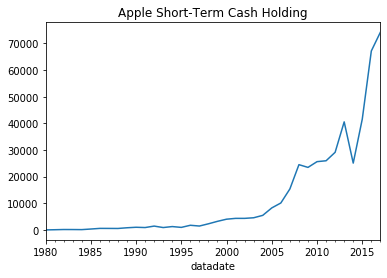

In [9]:
apple_funda.set_index('datadate').che.plot(title='Apple Short-Term Cash Holding')